In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv("./outputs/dumbbell_improvement/exp/acc.csv")
df1['NonIID'] = df1['Bucketing'].apply(lambda x: True)

df2 = pd.read_csv("./outputs/dumbbell/exp/acc.csv")
df2['Bucketing'] = df2['Agg'].apply(lambda x: False)
df2['RandomEdge'] = df2['Agg'].apply(lambda x: False)
df2 = df2[~df2['NonIID']]

df = pd.concat([df1, df2])
df = df[df['Group'] == 'clique 1']

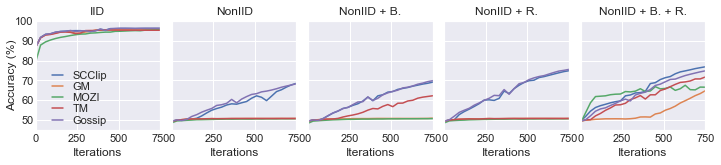

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 2
plt.rcParams["legend.columnspacing"] = 0.5
plt.rcParams["legend.handlelength"] = 1
plt.rcParams["legend.borderaxespad"] = 0
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.frameon"] = False


sns.set()
aggregators = ['SCClip', 'GM', 'MOZI', 'TM', 'Gossip']
colors = sns.color_palette()[:len(aggregators)]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 2), sharey=True)

def plot_iid(df, ax):
    for agg, c in zip(aggregators, colors):
        _df = df[df['Agg'] == agg]
        ax.plot(_df['Iterations'], _df['Accuracy (%)'], color=c, label=agg)

    ax.legend(loc='lower left', bbox_to_anchor=[0.1, 0.])
    ax.set_xlim(0, 750)
    ax.set_xlabel("Iterations")
    ax.set_title("IID")

plot_iid(df[~df['NonIID']], axes[0])

def plot_noniid(df, ax):
    for agg, c in zip(aggregators, colors):
        _df = df[df['Agg'] == agg]
        ax.plot(_df['Iterations'], _df['Accuracy (%)'], color=c, label=agg)
    ax.set_xlim(0, 750)
    ax.set_xlabel("Iterations")
    ax.set_title("NonIID")

plot_noniid(df[(df['NonIID']) & (~df['Bucketing']) & (~df['RandomEdge'])], axes[1])

def plot_bucketing(df, ax):
    for agg, c in zip(aggregators, colors):
        _df = df[df['Agg'] == agg]
        ax.plot(_df['Iterations'], _df['Accuracy (%)'], color=c, label=agg)

    ax.set_xlim(0, 750)
    ax.set_xlabel("Iterations")
    ax.set_title("NonIID + B.")

plot_bucketing(df[(df['NonIID']) & (df['Bucketing']) & (~df['RandomEdge'])], axes[2])

def plot_edge(df, ax):
    for agg, c in zip(aggregators, colors):
        _df = df[df['Agg'] == agg]
        ax.plot(_df['Iterations'], _df['Accuracy (%)'],  color=c, label=agg)

    ax.set_xlim(0, 750)
    ax.set_xlabel("Iterations")
    ax.set_title("NonIID + R.")

plot_edge(df[(df['NonIID']) & (~df['Bucketing']) & (df['RandomEdge'])], axes[3])


def plot_both(df, ax):
    for agg, c in zip(aggregators, colors):
        _df = df[df['Agg'] == agg]
        ax.plot(_df['Iterations'], _df['Accuracy (%)'],  color=c, label=agg)

    ax.set_xlim(0, 750)
    ax.set_xlabel("Iterations")
    ax.set_title("NonIID + B. + R.")

plot_both(df[(df['NonIID']) & (df['Bucketing']) & (df['RandomEdge'])], axes[4])

axes[0].set_ylim(45, 100)
axes[0].set_yticks([50, 60, 70, 80, 90, 100])
axes[0].set_ylabel('Accuracy (%)', labelpad=-2)
for i in range(5):
    axes[i].tick_params(axis='y', which='major', pad=-4)
    axes[i].tick_params(axis='x', which='major', pad=-2)

fig.subplots_adjust(wspace=0.093)

fig.savefig("./dumbbell_acc.pdf", bbox_inches="tight", dpi=720)
